<a href="https://colab.research.google.com/github/haticeyyildiz/NLP/blob/main/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,8)
pd.set_option('display.max_columns', 50)

### Data Wrangling

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df1 = df.copy()

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [13]:
df1["Recommended IND"].value_counts(dropna = False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

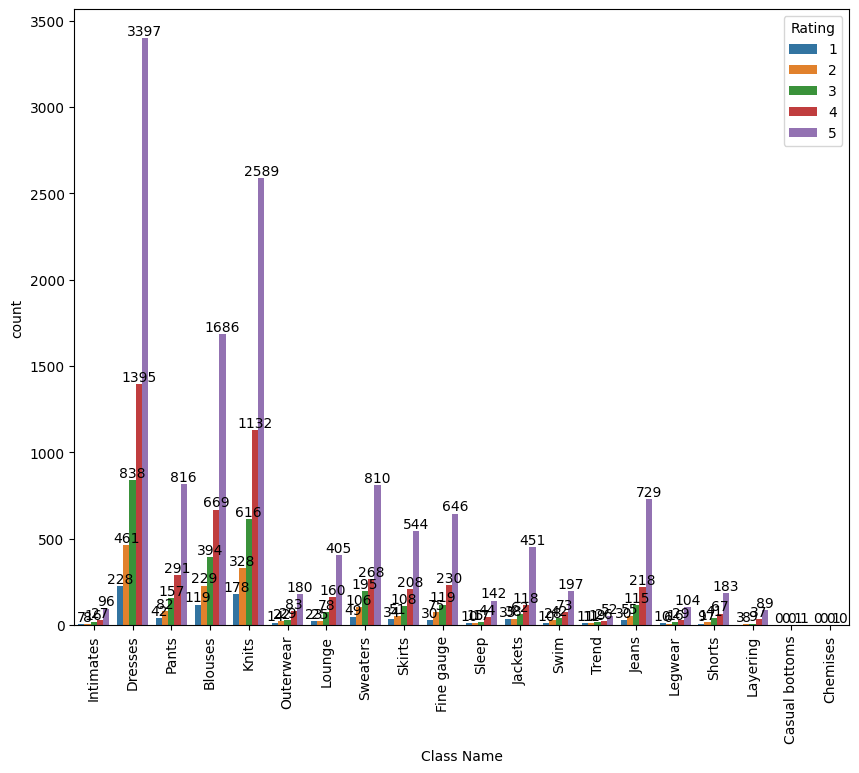

In [14]:
ax = sns.countplot(data = df, x ="Class Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

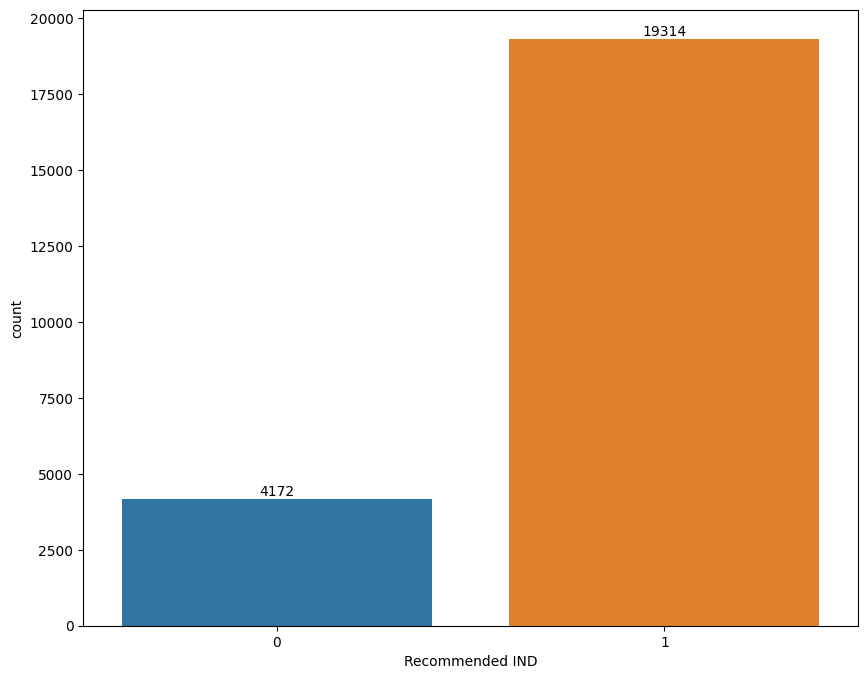

In [15]:
ax = sns.countplot(data =df1, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

In [16]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

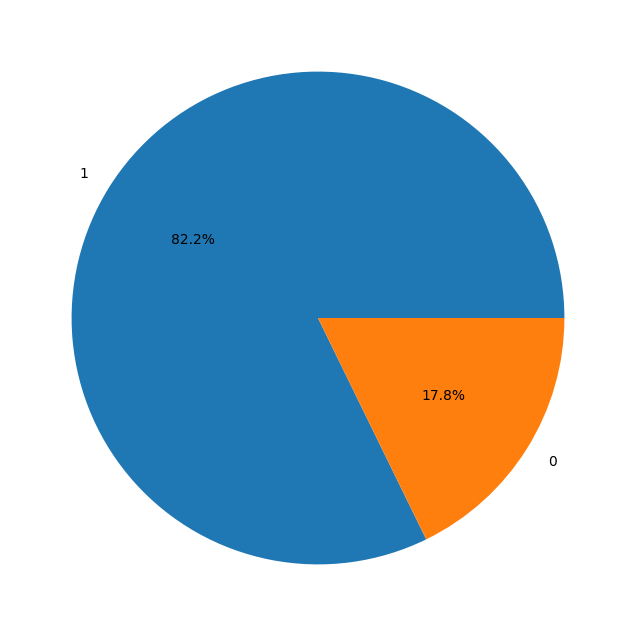

In [17]:
fig, ax = plt.subplots()
ax.pie(df["Recommended IND"].value_counts(normalize=True), labels=df["Recommended IND"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [18]:
df1 =df1[["Review Text", "Recommended IND"]]
df1.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [19]:
df1.rename(columns={'Review Text': 'review', 'Recommended IND': 'label'}, inplace=True)

In [20]:
df1.head()

,review,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [21]:
df1.isnull().sum()

review    845
label       0
dtype: int64

In [22]:
df1.dropna(axis = 0, inplace = True)

In [23]:
df1.isnull().sum()

review    0
label     0
dtype: int64

In [24]:
df1.reset_index(drop=True, inplace=True)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  22641 non-null  object
 1   label   22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


In [26]:
df1

,review,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [28]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [30]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [31]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [32]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #9. joining
    return " ".join( text_cleaned)

In [33]:
cleaning_text = df1["review"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [34]:
from wordcloud import WordCloud

In [35]:
positive_reviews = df1[df1["label"] == 1]["review"]

In [36]:
positive_reviews

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
22635    So i wasn't sure about ordering this skirt bec...
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: review, Length: 18540, dtype: object

In [37]:
negative_reviews = df1[df1["label"] == 0]["review"]

In [38]:
negative_reviews

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: review, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [39]:
positive_reviews = df1[df1["label"] == 1]["review"].apply(cleaning)

In [40]:
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: review, Length: 18540, dtype: object

In [41]:
negative_reviews = df1[df1["label"] == 0]["review"]

In [42]:
negative_reviews

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
22606    I tried these on because the color is really p...
22607    I wanted to love this jacket. so soft and grea...
22617    I purchased this for a very good price and i t...
22634    I was surprised at the positive reviews for th...
22638    This fit well, but the top was very see throug...
Name: review, Length: 4101, dtype: object

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [43]:
positive_words = " ".join(positive_reviews)

In [44]:
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [45]:
negative_words = " ".join(negative_reviews)

In [46]:
negative_words[:100]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe'

In [47]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [49]:
positive = worldcloud.generate(positive_words)

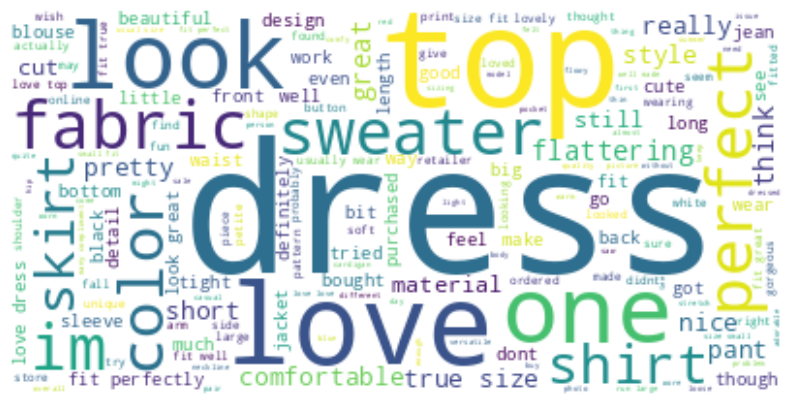

In [50]:
plt.figure(figsize = (10,10))
plt.imshow(positive, interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
negative = worldcloud.generate(negative_words)

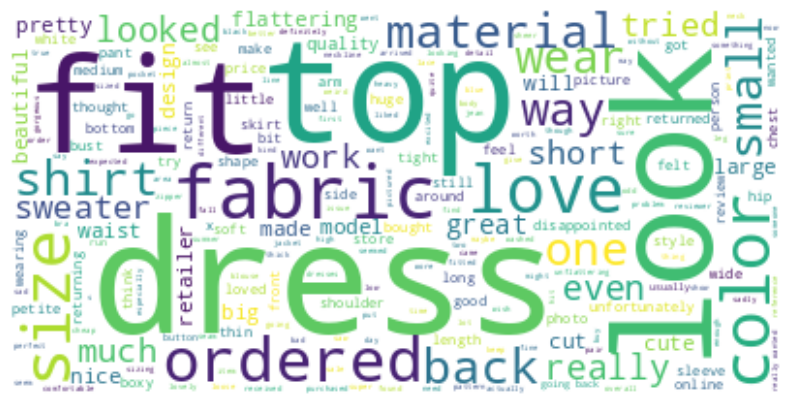

In [52]:
plt.figure(figsize = (10,10))
plt.imshow(negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In the next step we create a numerical feature vector for each document:

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X = df1["review"]
y = df1["label"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [57]:
len(y)

22641

### Count Vectorization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [61]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [64]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [65]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187138,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Eval Function

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [68]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced', random_state = 42)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [77]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 697  123]
 [ 551 3158]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.85      0.67       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [78]:
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight= "balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.854847
train_accuracy         0.871742
test_precision-neg     0.567482
train_precision-neg    0.597431
test_recall-neg        0.841822
train_recall-neg       0.895289
test_f1-neg            0.677698
train_f1-neg           0.716640
dtype: float64

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": [0.01, 0.02, 0.05]
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.02, 0.05]}, scoring='recall',
             verbose=2)

In [80]:
grid_search.best_params_

{'C': 0.05}

In [81]:
model = LogisticRegression(C = 0.05, max_iter=1000, class_weight= "balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.861141
train_accuracy         0.886613
test_precision-neg     0.582327
train_precision-neg    0.628814
test_recall-neg        0.832677
train_recall-neg       0.913102
test_f1-neg            0.685010
train_f1-neg           0.744747
dtype: float64

In [82]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


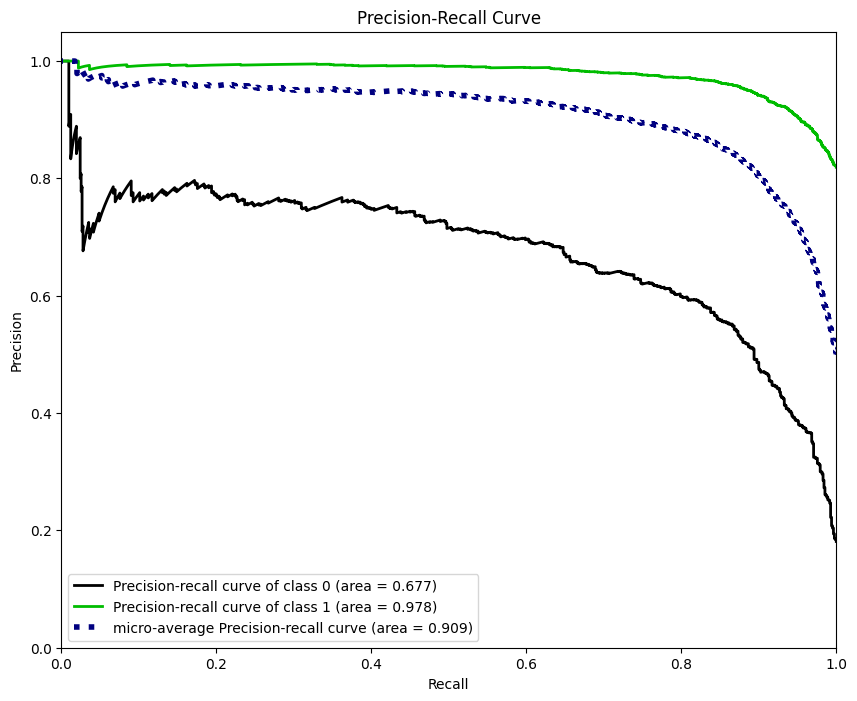

In [83]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight= "balanced", random_state=42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [85]:
from sklearn.metrics import average_precision_score

In [86]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)
log_count_AP = average_precision_score(y_test, y_pred)

### TF-IDF

In [87]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=42, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [88]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 696  124]
 [ 626 3083]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.85      0.65       820
           1       0.96      0.83      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.84      0.77      4529
weighted avg       0.88      0.83      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.68      3281
           1       0.97      0.84      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [89]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.841265
train_accuracy         0.850983
test_precision-neg     0.539454
train_precision-neg    0.555514
test_recall-neg        0.858587
train_recall-neg       0.887636
test_f1-neg            0.662340
train_f1-neg           0.683355
dtype: float64

In [90]:
param_grid = {
    "C": [0.01, 0.02, 0.1, 0.2, 0.5, 1]
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_tf_idf,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.02, 0.1, 0.2, 0.5, 1]},
             scoring='recall', verbose=2)

In [91]:
grid_search.best_params_

{'C': 1}

In [92]:
model = LogisticRegression(C= 1, max_iter=1000, random_state=42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.865944
train_accuracy         0.894134
test_precision-neg     0.591945
train_precision-neg    0.643909
test_recall-neg        0.843343
train_recall-neg       0.929832
test_f1-neg            0.695201
train_f1-neg           0.760892
dtype: float64

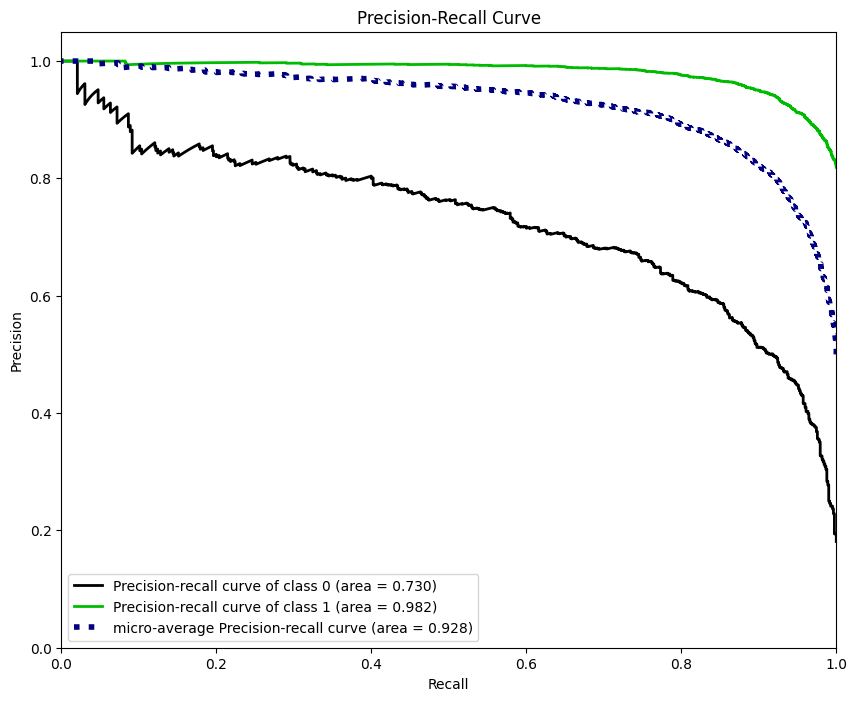

In [93]:
model = LogisticRegression(C=0.6, max_iter=1000, random_state=42, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test, y_pred)
log_tfidf_AP = average_precision_score(y_test, y_pred)

## Naive Bayes 

### Countvectorizer

In [95]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha= 1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [96]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 600  220]
 [ 323 3386]]
Test_Set
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       820
           1       0.94      0.91      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [97]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.885158
train_accuracy         0.903980
test_precision-neg     0.662162
train_precision-neg    0.706977
test_recall-neg        0.749771
train_recall-neg       0.802635
test_f1-neg            0.702880
train_f1-neg           0.751771
dtype: float64

In [98]:
param_grid = {
    "alpha": [1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
}
grid_search = GridSearchCV(MultinomialNB (), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 2.0, 3.0, 5.0, 10.0]},
             scoring='recall', verbose=2)

In [99]:
grid_search.best_params_

{'alpha': 10.0}

In [100]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.864123
train_accuracy         0.873043
test_precision-neg     0.815534
train_precision-neg    0.851122
test_recall-neg        0.323075
train_recall-neg       0.362593
test_f1-neg            0.462164
train_f1-neg           0.508533
dtype: float64

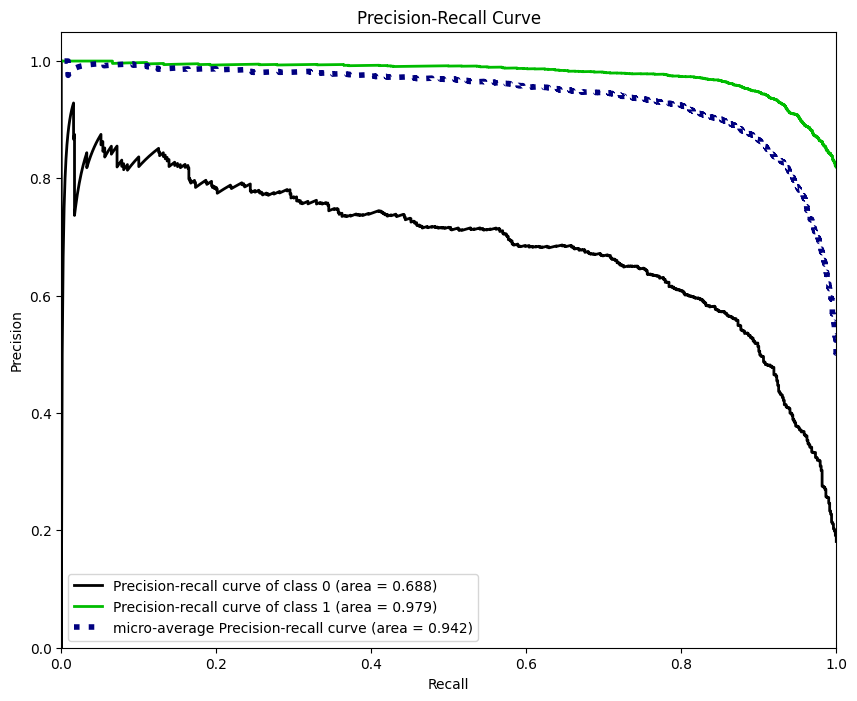

In [101]:
model = MultinomialNB(alpha=1.5)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [102]:
y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test, y_pred)
nb_count_AP = average_precision_score(y_test, y_pred)

### TF-IDF

In [103]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [104]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 593  227]
 [ 342 3367]]
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.72      0.68       820
           1       0.94      0.91      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [105]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.878975
train_accuracy         0.902673
test_precision-neg     0.643066
train_precision-neg    0.698651
test_recall-neg        0.749160
train_recall-neg       0.813742
test_f1-neg            0.691672
train_f1-neg           0.751814
dtype: float64

In [106]:
param_grid = {
    "alpha": [0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]
}
grid_search = GridSearchCV(BernoulliNB (), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]},
             scoring='recall', verbose=2)

In [107]:
grid_search.best_params_

{'alpha': 3.0}

In [108]:
model = BernoulliNB(alpha=3)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.867767
train_accuracy         0.885165
test_precision-neg     0.646723
train_precision-neg    0.696194
test_recall-neg        0.597076
train_recall-neg       0.649531
test_f1-neg            0.620618
train_f1-neg           0.672050
dtype: float64

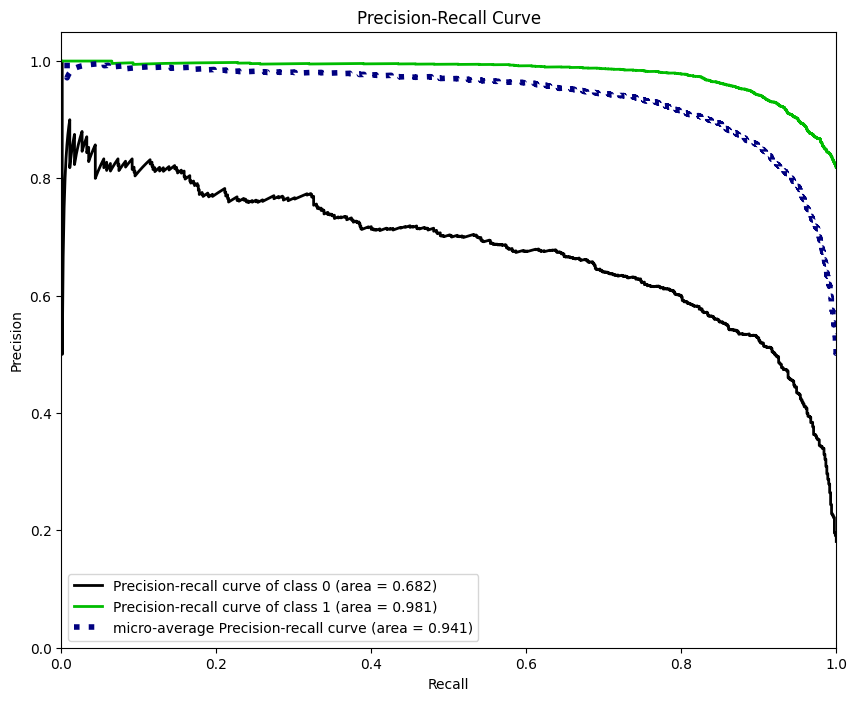

In [109]:
model = BernoulliNB(alpha=0.7)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [110]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test, y_pred)
nb_tfidf_AP = average_precision_score(y_test, y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [111]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [112]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 692  128]
 [ 585 3124]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       820
           1       0.96      0.84      0.90      3709

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [113]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.848111
train_accuracy         0.860203
test_precision-neg     0.553253
train_precision-neg    0.574003
test_recall-neg        0.847312
train_recall-neg       0.885502
test_f1-neg            0.669146
train_f1-neg           0.696508
dtype: float64

In [114]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

In [115]:
decision_function

array([ 0.2094474 ,  0.4957281 ,  1.07334663, ...,  0.68739848,
       -1.12010677, -0.50672835])

In [116]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test, y_pred)
svc_count_AP = average_precision_score(y_test, y_pred)

### TD-IDF

In [117]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [118]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 705  115]
 [ 553 3156]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.91      0.73      3281
           1       0.98      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [119]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.858049
train_accuracy         0.874988
test_precision-neg     0.572479
train_precision-neg    0.601818
test_recall-neg        0.863458
train_recall-neg       0.915981
test_f1-neg            0.688118
train_f1-neg           0.726381
dtype: float64

In [120]:
param_grid = {'C': 
              [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 10]
              }
grid_search = GridSearchCV(LinearSVC(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_tf_idf, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 10]},
             scoring='recall', verbose=2)

In [121]:
grid_search.best_params_

{'C': 10}

In [122]:
model = LinearSVC(C=10, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.852749
train_accuracy         0.965204
test_precision-neg     0.577260
train_precision-neg    0.842924
test_recall-neg        0.701620
train_recall-neg       0.992990
test_f1-neg            0.633059
train_f1-neg           0.911818
dtype: float64

In [123]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

In [124]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test, y_pred)
svc_tfidf_AP = average_precision_score(y_test, y_pred)

## Random Forest

### Countvectorizer

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 7, random_state = 42, class_weight="balanced",n_jobs = -1) 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [126]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 660  160]
 [ 620 3089]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.80      0.63       820
           1       0.95      0.83      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.86      0.68      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [127]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs= -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring =  scoring, cv = 10, return_train_score=True, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.837953
train_accuracy         0.857755
test_precision-neg     0.535838
train_precision-neg    0.572496
test_recall-neg        0.797016
train_recall-neg       0.850148
test_f1-neg            0.640689
train_f1-neg           0.684134
dtype: float64

In [128]:
param_grid = {"n_estimators":[50, 75, 100],
              "max_depth": [5, 7, 10]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced"), param_grid, cv=10, verbose=2, n_jobs=-1, scoring = 'recall')
grid_search.fit(X_train_count, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [50, 75, 100]},
             scoring='recall', verbose=2)

In [129]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [130]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs= -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring =  scoring, cv = 10, return_train_score=True, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.845793
train_accuracy         0.877687
test_precision-neg     0.552549
train_precision-neg    0.614424
test_recall-neg        0.791842
train_recall-neg       0.873040
test_f1-neg            0.650645
train_f1-neg           0.721173
dtype: float64

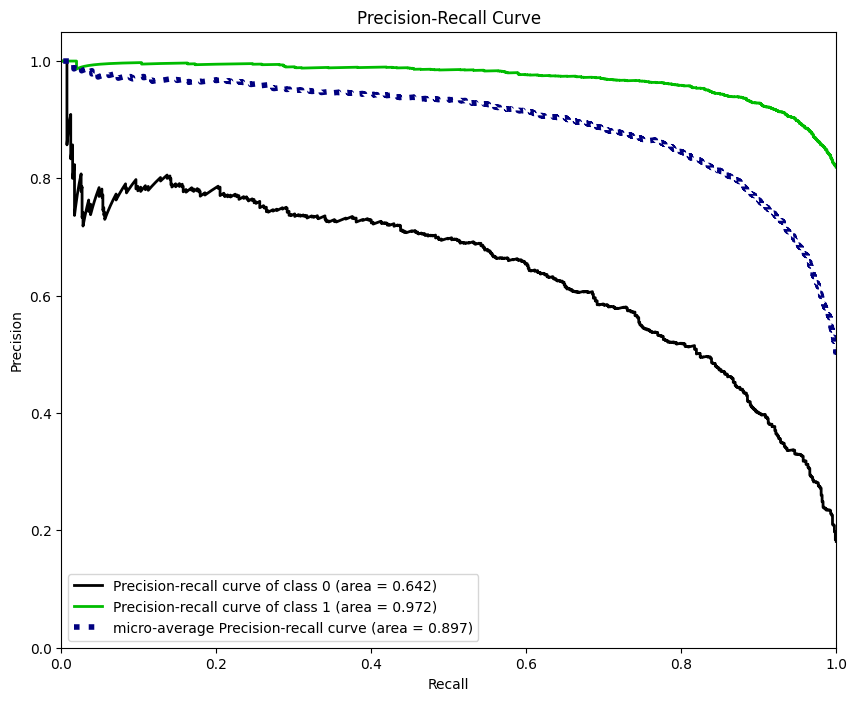

In [131]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [132]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test, y_pred)
rf_count_AP = average_precision_score(y_test, y_pred)

### TF-IDF

In [133]:
rf = RandomForestClassifier(100, max_depth=7, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [134]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 661  159]
 [ 665 3044]]
Test_Set
              precision    recall  f1-score   support

           0       0.50      0.81      0.62       820
           1       0.95      0.82      0.88      3709

    accuracy                           0.82      4529
   macro avg       0.72      0.81      0.75      4529
weighted avg       0.87      0.82      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      3281
           1       0.97      0.84      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [135]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.827849
train_accuracy         0.851099
test_precision-neg     0.516319
train_precision-neg    0.556971
test_recall-neg        0.807080
train_recall-neg       0.873345
test_f1-neg            0.629617
train_f1-neg           0.680069
dtype: float64

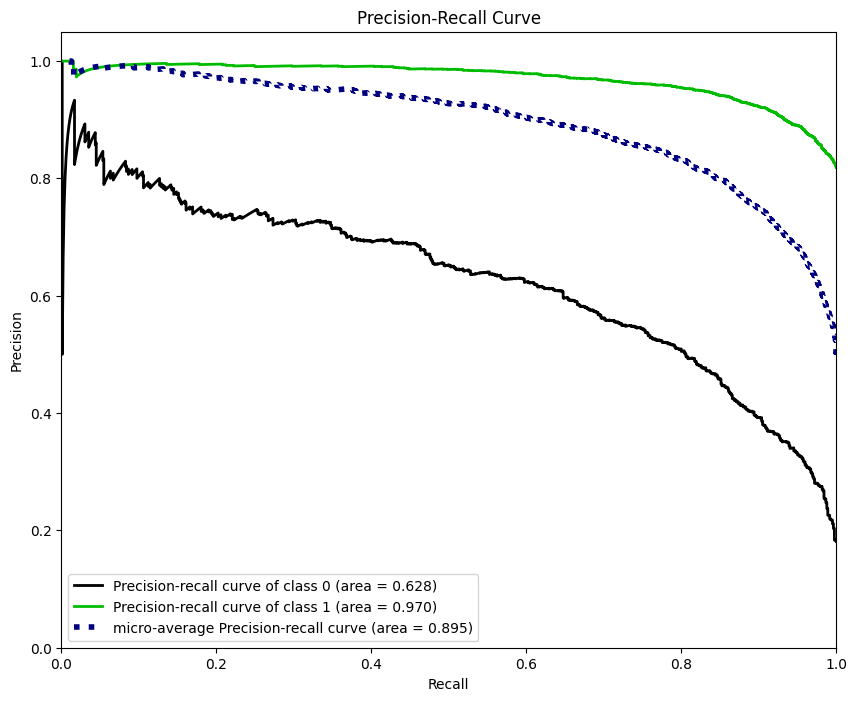

In [136]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [137]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test, y_pred)
rf_tfidf_AP = average_precision_score(y_test, y_pred)

## Ada Boosting

### Countvectorizer

In [138]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [139]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 396  424]
 [ 184 3525]]
Test_Set
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       820
           1       0.89      0.95      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.79      0.72      0.74      4529
weighted avg       0.85      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      3281
           1       0.90      0.96      0.93     14831

    accuracy                           0.88     18112
   macro avg       0.81      0.74      0.77     18112
weighted avg       0.87      0.88      0.87     18112



In [140]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.870252
train_accuracy         0.877393
test_precision-neg     0.690472
train_precision-neg    0.719174
test_recall-neg        0.516007
train_recall-neg       0.530258
test_f1-neg            0.590068
train_f1-neg           0.610419
dtype: float64

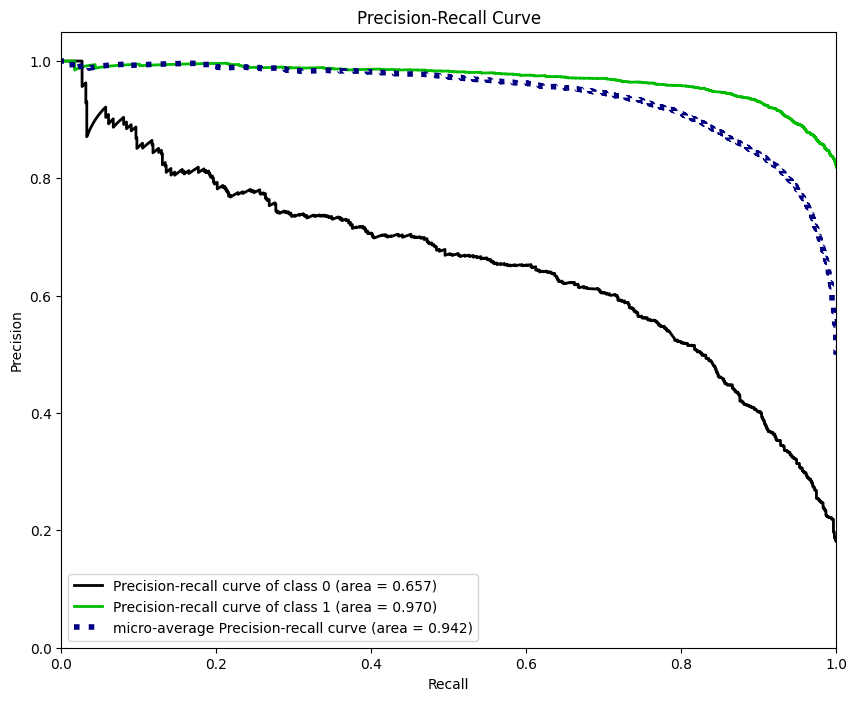

In [142]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [143]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test, y_pred)
ada_count_AP = average_precision_score(y_test, y_pred)

### TF-IDF

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [145]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 417  403]
 [ 200 3509]]
Test_Set
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       820
           1       0.90      0.95      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.79      0.73      0.75      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.74      0.54      0.63      3281
           1       0.90      0.96      0.93     14831

    accuracy                           0.88     18112
   macro avg       0.82      0.75      0.78     18112
weighted avg       0.87      0.88      0.88     18112



In [146]:
model = AdaBoostClassifier(n_estimators=100, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.871135
train_accuracy         0.882558
test_precision-neg     0.692348
train_precision-neg    0.733710
test_recall-neg        0.521486
train_recall-neg       0.552067
test_f1-neg            0.594467
train_f1-neg           0.630036
dtype: float64

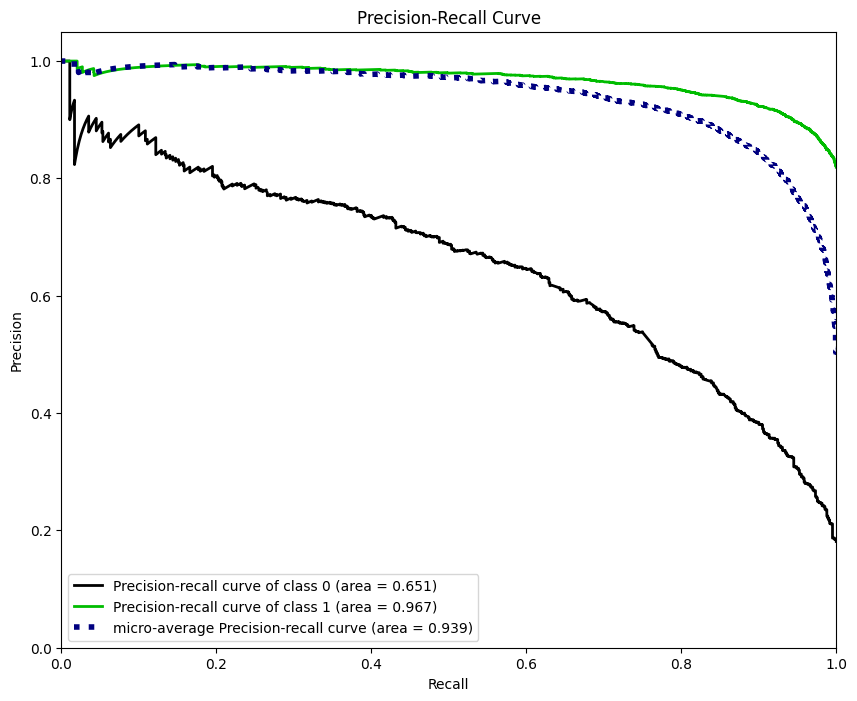

In [147]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [148]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test, y_pred)
ada_tfidf_AP = average_precision_score(y_test, y_pred)

## DL modeling

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [150]:
num_words = 15001 
tokenizer = Tokenizer(num_words=num_words)

In [151]:
tokenizer.fit_on_texts(X)

### Creating word index

In [152]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [153]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [154]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [155]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [156]:
max_tokens = 102

In [157]:
num_tokens.max()

116

In [158]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9564948544675589

### Fixing token counts of all documents (pad_sequences)

In [159]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [160]:
X_pad.shape

(22641, 102)

### Train Set Split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [163]:
model = Sequential()

In [164]:
embedding_size = 50

In [165]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [166]:
optimizer = Adam(learning_rate=0.001)

In [167]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [168]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 102, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 102, 50)           0         
                                                                 
 gru (GRU)                   (None, 102, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 102, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 102, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 102, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

### Model Evaluation

In [169]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [170]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [171]:
model.fit(X_train, y_train, epochs=1, batch_size=128, sample_weight=classes_weights, callbacks=[early_stop],
         validation_data=(X_test, y_test))

142/142 [==============================] - 28s 141ms/step - loss: 0.5064 - recall: 0.7739 - val_loss: 0.3208 - val_recall: 0.8652


In [172]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.506446,0.773919,0.320755,0.865193


In [173]:
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

142/142 [==============================] - 4s 20ms/step
[[ 688  132]
 [ 500 3209]]
              precision    recall  f1-score   support

           0       0.58      0.84      0.69       820
           1       0.96      0.87      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529



In [174]:
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 11s 19ms/step
[[ 2962   319]
 [ 1772 13059]]
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



142/142 [==============================] - 3s 18ms/step


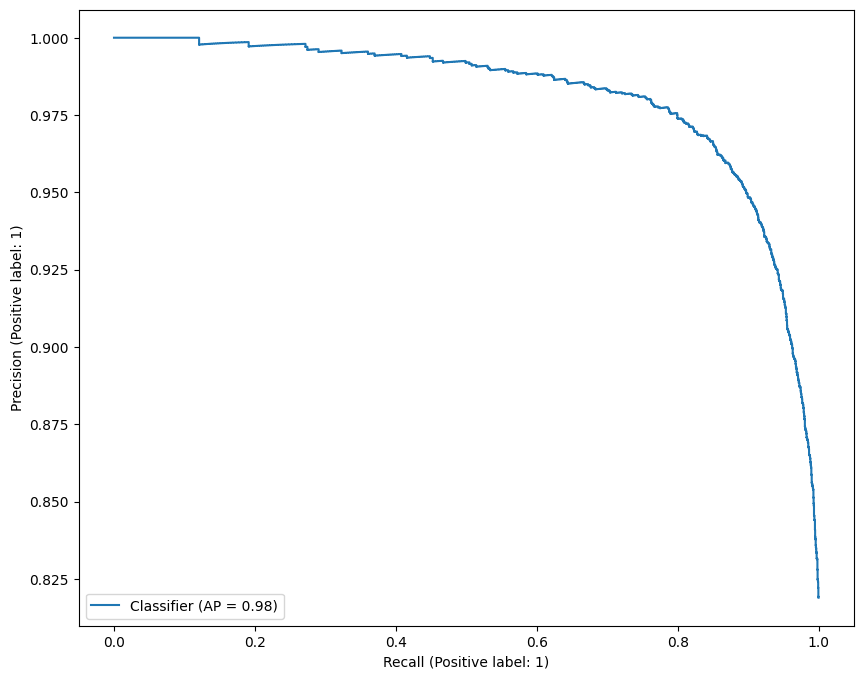

In [175]:
from sklearn.metrics import PrecisionRecallDisplay
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [176]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [177]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.3 MB/s eta 0:00:00


### Read Data

In [178]:
# df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
# df.head()
# df.rename(columns={'Review Text': 'review', 'Recommended IND': 'label'}, inplace=True)

### Train test split

In [179]:
# X = df["review"]
# y = df["label"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Tokenization

In [180]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [181]:
max_tokens = []
for sent in X:  
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_tokens.append(len(input_ids))
print('Max sentence length: ', max(max_tokens))

Max sentence length:  162


In [182]:
np.array(max_tokens).mean()

76.75659202332052

### Transformation Vectors to Matrices

In [183]:
tokens = tokenizer(list(X), max_length=162, truncation=True,
                                    padding='max_length', add_special_tokens=True)
tokens

In [184]:
np.array(tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [185]:
np.array(tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [186]:
def transformation(X):
  seq_len = 162

  tokens = tokenizer(list(X), max_length=max(max_tokens), truncation=True,
                                      padding='max_length', add_special_tokens=True) 

  return np.array(tokens['input_ids']), np.array(tokens['attention_mask'])

In [187]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [188]:
print("Xids_train Shape:", Xids_train.shape)
print("Xmask_train Shape:", Xmask_train.shape)
print("Xids_test Shape:", Xids_test.shape)
print("Xmask_test Shape:", Xmask_test.shape)

Xids_train Shape: (18112, 162)
Xmask_train Shape: (18112, 162)
Xids_test Shape: (4529, 162)
Xmask_test Shape: (4529, 162)


In [189]:
y_train2

1176     1
15250    1
5784     1
12924    0
8781     1
        ..
2761     1
15304    1
16497    1
17687    0
2607     1
Name: label, Length: 18112, dtype: int64

In [190]:
y_train2 = np.array(y_train2)

In [191]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [192]:
y_test2 = np.array(y_test2)

In [193]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [194]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [195]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [196]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [197]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [198]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [199]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [200]:
batch_size = 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [201]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [202]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1132
113


### Creating optimization

In [203]:
from official.nlp import optimization
epochs = 2
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5 
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [204]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [205]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [206]:
pd.Series(y).value_counts(normalize=True)

1    0.818868
0    0.181132
Name: label, dtype: float64

In [207]:
weights = {0:0.18, 1:0.81}

### Model Fiting

In [208]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [209]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
566/566 [==============================] - 176s 140ms/step - loss: 0.4180 - recall: 0.7327 - val_loss: 0.3952 - val_recall: 0.9846
Epoch 2/2
566/566 [==============================] - 62s 109ms/step - loss: 0.3458 - recall: 0.8542 - val_loss: 0.3401 - val_recall: 0.9650


### Model evaluation

In [210]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

142/142 [==============================] - 27s 94ms/step
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       820
           1       0.94      0.96      0.95      3709

    accuracy                           0.92      4529
   macro avg       0.88      0.85      0.87      4529
weighted avg       0.92      0.92      0.92      4529



In [211]:

y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred)) 

566/566 [==============================] - 17s 28ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3281
           1       0.96      0.98      0.97     14831

    accuracy                           0.95     18112
   macro avg       0.93      0.91      0.92     18112
weighted avg       0.95      0.95      0.95     18112



In [212]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

142/142 [==============================] - 6s 29ms/step


0.9838654050773976

In [213]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

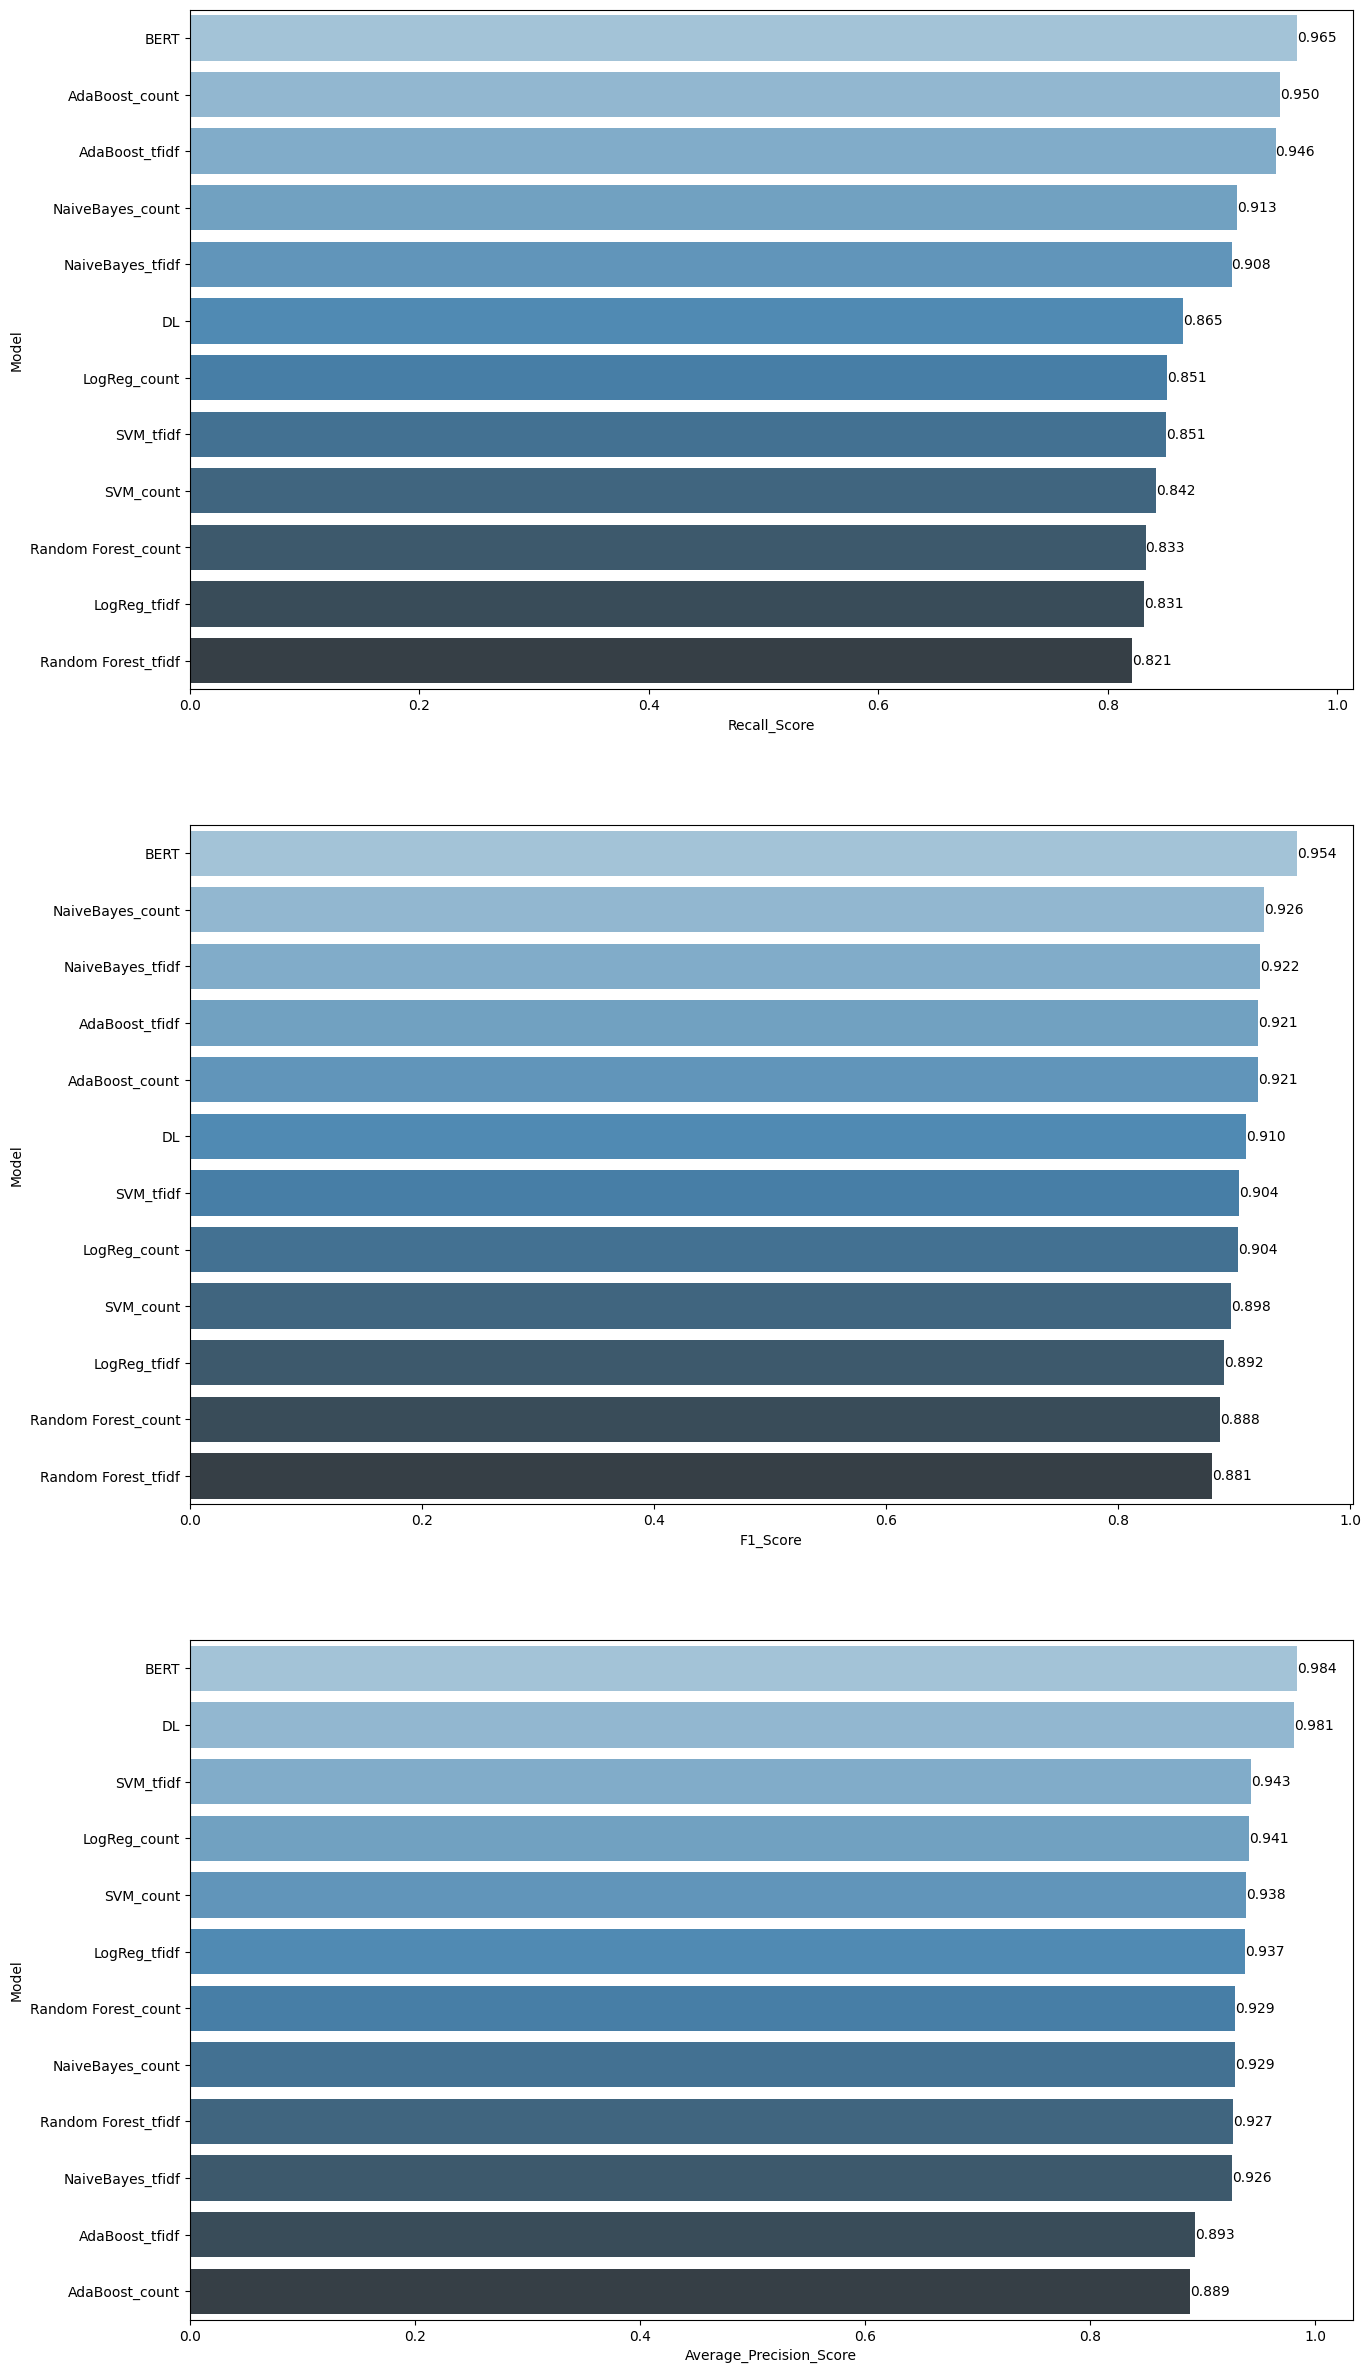

In [214]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT",],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],
                        
                        "Average_Precision_Score": [nb_count_AP, log_count_AP, svc_count_AP, rf_count_AP,
                                                   ada_count_AP, nb_tfidf_AP, log_tfidf_AP, svc_tfidf_AP,
                                                   rf_tfidf_AP, ada_tfidf_AP, DL_AP, BERT_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

When all the models we use are evaluated, we see that we got the best scores from the BERT model.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___